### Importación de Librerías

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') #Estilo de Seaborn
pd.set_option('display.max_columns', 100)

### Loading Datasets

In [2]:
abril2016 = pd.read_excel('data/permiso-de-edificacion---aprobado-abril-2016.xlsx')
abril2016.drop(columns=['Unnamed: 0', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 41'], \
               inplace=True, axis=1)
abril2016 = abril2016[['Numero Permiso', 'Fecha Permiso', 'Denominación', 'Superficie Edificada m2', 
                       'Descripción Acto', 'N° de Pisos', 'Propietario', 'Arquitecto', 'Constructor',
                       'Rol', 'Calle', 'N° Domiciliario', 'Cert Inf Prev N°', 'Fecha Ultima Actualización',
                       'Efectos Generales', 'Medio Publicidad Fecha de Notificación', 'Link']]
abril2016.head()

,Numero Permiso,Fecha Permiso,Denominación,Superficie Edificada m2,Descripción Acto,N° de Pisos,Propietario,Arquitecto,Constructor,Rol,Calle,N° Domiciliario,Cert Inf Prev N°,Fecha Ultima Actualización,Efectos Generales,Medio Publicidad Fecha de Notificación,Link
0,29,04-04-2016,RESTITUCION DE VANO y AMPLIACION MENOR A 100 m2,"150,05",VIVIENDA COLECTIVA,NaN,VALERIA AMIAMA // NOEL REDARD AYALA,FELIPE FRITZ TORO,FELIPE FRITZ TORO,00473-00006,Av. Presidente Kennedy,3480,2117 del 2015,2016-04-04,NO,2016-05-09,NaN
1,30,07-04-2016,OBRA NUEVA - EDIFICIO RESIDENCIAL DE DEPARTAME...,"10566,65",VIVIENDA COLECTIVA,NaN,INMOBILIARIA CST LA LLAVERÍA S.A.,RENE JOGLAR MANCILLA,ANDRES UGARTE VALDES,02527-00008,La Llavería,1070,290 del 2016,2016-04-07,NO,2016-05-09,NaN
2,NaN,NaN,OBRA NUEVA - EDIFICIO RESIDENCIAL DE DEPARTAME...,"10566,65",VIVIENDA COLECTIVA,NaN,INMOBILIARIA CST LA LLAVERÍA S.A.,RENE JOGLAR MANCILLA,ANDRES UGARTE VALDES,02527-00010,Tupungato,9519,290 del 2016,2016-04-07,NO,2016-05-09,NaN
3,NaN,NaN,OBRA NUEVA - EDIFICIO RESIDENCIAL DE DEPARTAME...,"10566,65",VIVIENDA COLECTIVA,NaN,INMOBILIARIA CST LA LLAVERÍA S.A.,RENE JOGLAR MANCILLA,ANDRES UGARTE VALDES,02527-00004,Alacalufes,1085,290 del 2016,2016-04-07,NO,2016-05-09,NaN
4,31,07-04-2016,AMPLIACION y ALTERACION DE LOCAL COMERCIAL,"293,99",EQUIPAMIENTO COMERCIO,2 pisos,MARIA FRANCISCA PRIETO CORREA,JAIME AGUIRRE PORTALES,JAIME AGUIRRE PORTALES,01203-00014,Av. Juan XXIII,6190,1053 del 2015,2016-04-07,NO,2016-05-09,NaN


In [3]:
febrero2016 = pd.read_excel('data/permiso-de-edificacion---aprobado-febrero-2016.xlsx')
febrero2016 = febrero2016[['Numero Permiso', 'Denominación', 'Superficie Edificada m2', 'Descripción Acto',
                           'N° de Pisos', 'Propietario', 'Arquitecto', 'Constructor', 'Rol', 'Calle', 
                            'N° Domiciliario', 'Cert Inf Prev N°']]
febrero2016.head()

,Numero Permiso,Denominación,Superficie Edificada m2,Descripción Acto,N° de Pisos,Propietario,Arquitecto,Constructor,Rol,Calle,N° Domiciliario,Cert Inf Prev N°
0,13,OBRA NUEVA RESTAURANTE,262,COMERCIO,2 PISOS,RENTAS MASU S.A.,MATIAS HONORATO TORREALBA,ANDRES JACOBO LINK GAISINSKY (Res.DOM Nº 116/2...,00553-00008,Av. Nueva Costanera,3961,685 del 2015
1,14,ALTERACION Y AMPLIACION MENOR A 100 M2 EN 1º Y...,"380,49",VIVIENDA,2 Pisos + Subterrane,CHRISTIAN PABST GARCIA / YELENA MITROVIC FASCI...,MARIA FERNANDA DEL VILLAR,A PROPUESTA (Art. 1.2.1 Y 5.1.8 OGUC),03221-00010,Rayén,6728,360 del 2015
2,15,AMPLIACION Y ALTERACION DE VIVIENDA UNIFAMILIAR,"307,11",VIVIENDA UNIFAMILIAR,2 PISOS,RODRIGO ESCALA AMIGO,JUAN PABLO VICUÑA LUCO,MARCELO ETCHEVERRY DUHALDE,03233-00001,Sagaro,447,929 del 2015
3,16,ALTERACION Y AMPLIACION MENOR A 100 M2,"340,86",VIVIENDA,2 PISOS,JUAN ENRIQUE GABLER,LUIS RAMIREZ BIDDAU,GUNTHER ROCHEFORT RAVINET,00557-00020,Obispo Sierra,2742,942 del 2015
4,17,ALTERACION Y AMPLIACION MENOR A 100 M2 DE VIVI...,"207,91",VIVIENDA,2 PISOS,SERGIO ABARCA IBARRA / ASTRID ABARCA IBARRA,JORGE LIRA WELDT,JORGE LIRA WELDT,02175-00019,Los Dragones,9965,1882 del 2015


In [4]:
enero2017 = pd.read_excel('data/permiso-de-edificacion---aprobados-enero-2017.xlsx')
enero2017.drop(columns=['Unnamed: 0'], inplace=True)
enero2017.head()

,Numero Permiso,Fecha Permiso,Denominación,Superficie Edificada m2,Descripción Acto,N° de Pisos,Propietario,Arquitecto,Constructor,Rol,Calle,N° Domiciliario,Cert Inf Prev N°,Fecha Ultima Actualización,Efectos Generales,Unnamed: 16
0,01,12-01-2017,AMPLIACION y ALTERACION DE VIVIENDA UNIFAMILIAR,"179,16",VIVIENDA UNIFAMILIAR,2 pisos,NICOLÁS SAIEH LARRONDE,CLAUDIO TAPIA LEON,JAIME BRAVO HEPP,02343-00003,Mayas Poniente,6665,909 del 2016,2017-01-12,NO,2017-01-06
1,02,13-01-2017,ALTERACION DE VIVIENDA UNIFAMILIAR PAREADA,"182,25",VIVIENDA UNIFAMILIAR,2 PISOS,INVERSIONES Y ASESORÍAS GÉNESIS LTDA.,CRISTOBAL RUIZ-TAGLE BAEZA,JONATHAN ALFONSO GARRIDO SEPULVEDA,01453-00001,Dolores,5709,650 del 2016,2017-01-13,NO,2017-01-06
2,03,13-01-2017,ALTERACION DE VIVIENDA UNIFAMILIAR PAREADA,"173,59",VIVIENDA UNIFAMILIAR,2 pisos,INVERSIONES Y ASESORÍAS GÉNESIS LTDA.,CRISTOBAL RUIZ-TAGLE BAEZA,JONATHAN ALFONSO GARRIDO SEPULVEDA,01453-00002,Cuernavaca,1819,762 del 2016,2017-01-13,NO,2017-01-06
3,04,13-01-2017,OBRA NUEVA - 1 EDIFICIO DE DEPARTAMENTOS,"9764,23",VIVIENDA COLECTIVA,7 pisos+1 retirado,INMOBILIARIA LO GALLO S.A.,MATIAS SILVA CABELLOS,A PROPUESTA (Art.1.2.1 y 5.1.8.OGUC),02413-00006,Mar Jónico,8075,2152 del 2016,2017-01-13,NO,2017-01-06
4,NaN,NaN,OBRA NUEVA - 1 EDIFICIO DE DEPARTAMENTOS,"9764,23",VIVIENDA COLECTIVA,7 pisos+1 retirado,INMOBILIARIA LO GALLO S.A.,MATIAS SILVA CABELLOS,A PROPUESTA (Art.1.2.1 y 5.1.8.OGUC),02413-00002,Pasaje Lo Gallo,1825,2152 del 2016,2017-01-13,NO,2017-01-06


In [5]:
febrero2017 = pd.read_excel('data/permiso-de-edificacion---aprobados-febrero-2017.xlsx')
febrero2017 = febrero2017[['Numero Permiso', 'Fecha Permiso', 'Denominación', 'Superficie Edificada m2',
                           'Descripción Acto', 'N° de Pisos', 'Propietario', 'Arquitecto', 'Constructor',
                           'Rol', 'Calle', 'N° Domiciliario', 'Cert Inf Prev N°', 'Fecha Ultima Actualización',
                           'Efectos Generales']]
febrero2017.head()

,Numero Permiso,Fecha Permiso,Denominación,Superficie Edificada m2,Descripción Acto,N° de Pisos,Propietario,Arquitecto,Constructor,Rol,Calle,N° Domiciliario,Cert Inf Prev N°,Fecha Ultima Actualización,Efectos Generales
0,10,01-02-2017,AMPLIACION (Menor a 100 m2) y ALTERACION DE VI...,"149,21",VIVIENDA UNIFAMILIAR,2 pisos,CECILIA MORENO STEINMETZ,CECILIA BARREAU VELASCO,CECILIA BARREAU VELASCO,01901-00002,Pasaje Bartolomé Sharp,1587,1835 del 2016,2017-02-01,NO
1,11,06-02-2017,AMPLIACION - ALTERACION DE VIVIENDA UNIFAMILIA...,"139,93",VIVIENDA UNIFAMILIAR,2 pisos,SERGIO HIDALGO PIROTTE CARMONA / XIMENA HIDALG...,NICOLAS VERGARA ANGUITA,EDUARDO ANGUITA GAETE,00453-00013,Las Quilas,4278,784 del 2016,2017-02-06,NO
2,12,06-02-2017,OBRA NUEVA - EDIFICIO DE VIVIENDA COLECTIVA,"6057,24",VIVIENDA COLECTIVA,5 pisos+PR,INMOBILIARIA CANDELARIA SPA,GERMAN LAMARCA GARCIA,A PROPUESTA,01239-00005,Candelaria Goyenechea,4599,2100 del 2016,2017-02-06,NO
3,13,14-02-2017,AMPLIACION Y ALTERACION DE VIVIENDA PAREADA,"173,12",VIVIENDA,2 PISOS,FELIPE YÁÑEZ VILLANUEVA,RAIMUNDO CORREA PUELMA,RAIMUNDO CORREA PUELMA,01493-00006,Espoz,5891,156 del 2016,2017-02-14,NO
4,14,15-02-2017,AMPLIACION Y ALTERACION DE VIVIENDA UNIFAMILIA...,"215,63",VIVIENDA,2 PISOS,SEBASTIÁN FERNÁNDEZ-BUSSY,MARIA TERESA GUZMAN,MARIA TERESA GUZMAN,01333-00015,Manuela Cañas,2365,1262 del 2016,2017-02-15,NO


In [6]:
marzo2016 = pd.read_excel('data/permiso-de-edificacion---aprobados-marzo-2016.xlsx')
marzo2016 = marzo2016[['Numero Permiso', 'Fecha Permiso', 'Denominación', 'Superficie Edificada m2', 
                       'Descripción Acto', 'N° de Pisos', 'Propietario', 'Arquitecto', 'Constructor',
                       'Rol', 'Calle', 'N° Domiciliario', 'Cert Inf Prev N°', 'Fecha Ultima Actualización',
                       'Efectos Generales', 'Medio Publicidad Fecha de Notificación', 'Link']]
marzo2016.head()

,Numero Permiso,Fecha Permiso,Denominación,Superficie Edificada m2,Descripción Acto,N° de Pisos,Propietario,Arquitecto,Constructor,Rol,Calle,N° Domiciliario,Cert Inf Prev N°,Fecha Ultima Actualización,Efectos Generales,Medio Publicidad Fecha de Notificación,Link
0,22,04-03-2016,INSTALACION DE ENVIGADO A LA VISTA,"898,1",EQUIP.DE COMERCIO Y SERVICIOS,2 Pisos+Subterrraneo,INMOBILIARIA CSUSTENTA LTDA,GISELA LITVANYI PERLWITZ,GISELA LITVANYI PERLWITZ,01825-00024,Las Hualtatas,8412,2184 del 2015,2016-03-04,NO,2016-04-07,NaN
1,23,14-03-2016,"AMPLIACION , HABILITACION y CAMBIO DE DESTINO ...","542,61",EDUCACIONAL,2 pisos,MARIA ABUD/ALEJANDRO DUGHMAN/SERGIO DUGHMAN,JUAN MONZALVETT SCHWABE,JORGE ILATO ROSAS HUERTA,01207-00011,Av. Manquehue Norte,1880,1249 del 2015,2016-03-14,NO,2016-04-07,NaN
2,24,16-03-2016,AMPLIACION y ALTERACION DE VIVIENDA UNIFAMILIAR,"212,32",VIVIENDA UNIFAMILIAR,2 pisos,HUGO LECAROS FERNÁNDEZ,MARIA BEATRIZ LARRAIN ASPILLAGA,MARIA BEATRIZ LARRAIN ASPILLAGA,03405-00160,Barbastro,11254,1350 del 2015,2016-03-16,NO,2016-04-07,NaN
3,25,16-03-2016,OBRA NUEVA - VIVIENDA UNIFAMILIAR AISLADA,"28,82",VIVIENDA UNIFAMILIAR,1 piso,AGUSTIN DENEGRI TROMBEN,SEBASTIAN HERRERA DENEGRI TROMBEN,SEBASTIAN HERRERA DENEGRI TROMBEN,01185-00015,Av. Luis Pasteur,5570,2217 del 2016,2016-03-16,NO,2016-04-07,NaN
4,26,29-03-2016,OBRA NUEVA DE VIVIENDA UNIFAMILIAR AISLADA,"178,9",VIVIENDA,2 PISOS,PAULINA ANDREA QUIROZ BARRA,DULCE ELENA SANCHEZ,A LICITAR,03025-00037,Gran Vía,10145,612 del 2015,2016-03-29,NO,2016-04-07,NaN


In [7]:
marzo2017 = pd.read_excel('data/permiso-de-edificacion---aprobados-marzo-2017.xlsx', header=1)
marzo2017 = marzo2017[['Numero Permiso', 'Fecha Permiso', 'Denominación', 'Superficie Edificada m2',
                       'Descripción Acto', 'N° de Pisos', 'Propietario', 'Arquitecto', 'Constructor',
                       'Rol', 'Calle', 'N° Domiciliario', 'Cert Inf Prev N°', 'Fecha Ultima Actualización',
                       'Efectos Generales', 'Medio Publicidad Fecha de Notificación']]
marzo2017.head()

,Numero Permiso,Fecha Permiso,Denominación,Superficie Edificada m2,Descripción Acto,N° de Pisos,Propietario,Arquitecto,Constructor,Rol,Calle,N° Domiciliario,Cert Inf Prev N°,Fecha Ultima Actualización,Efectos Generales,Medio Publicidad Fecha de Notificación
0,20,01-03-2017,AMPLIACION CON ALTERACION VIVIENDA UNIFAMILIAR...,"169,88",VIVIENDA UNIFAMILIAR,2 pisos,VIVALDI SPA,MARTIN TAPIA MOLINA,MARTIN TAPIA MOLINA,01979-00008,Los Molinos,8741,1784 del 2016,2017-03-01,NO,2017-04-10
1,21,08-03-2017,AMPLIACION y ALTERACION DE VIVIENDA UNIFAMILIA...,"183,7",VIVIENDA UNIFAMILIAR,2 pisos,MATÍAS GONZÁLEZ CASTRO,MATÍAS GONZÁLEZ CASTRO,MATÍAS GONZÁLEZ CASTRO,02415-00019,Monseñor Escriva de Balaguer,8976,1937 del 2016,2017-03-08,NO,2017-04-10
2,22,17-03-2017,ALTERACION (Demolicion Parcial) y CAMBIO DE DE...,"1198,52",EQUIPAMIENTO DE SERVICIOS,2 pisos,CLÍNICA ALEMANA DE SANTIAGO S.A.,MARCELA QUILODRAN B. // GUSTAVO GREENE W.,JULIO FARFAN VILLEGAS,01031-00039,Av. Manquehue,1370,1551 del 2016,2017-03-17,NO,2017-04-10
3,23,20-03-2017,AMPLIACION y ALTERACION DE VIVIENDA UNIFAMILIAR,"182,05",VIVIENDA UNIFAMILIAR,2 pisos,PAMELA RIQUELME ULLOA Y CÉSAR CANALES TOLEDO,PATRICIO ARRIAGADA PINO,VICTOR GUNEL CORREA,01453-00005,Cuernavaca,1807,117 del 2016,2017-03-20,NO,2017-04-10
4,24,20-03-2017,OBRA NUEVA - VIVIVENDA UNIFAMILIAR,"166,74",VIVIENDA UNIFAMILIAR,2 pisos,CAROLINA BERGH RIQUELME - FRANCISCO DURAN ROJAS,ALEJANDRO POLLONI VERGARA,ALEJANDRO POLLONI VERGARA,01633-00011,Juan de Escaray,6675,1336 del 2017,2017-03-20,NO,2017-04-10


In [8]:
enero2016 = pd.read_excel('data/permiso-de-obra-menor---aprobado-enero-2016.xlsx')
enero2016 = enero2016[['Numero Permiso', 'Fecha Permiso', 'Denominación', 'Superficie Edificada m2',
                       'Descripción Acto', 'N° de Pisos', 'Propietario', 'Arquitecto', 'Constructor',
                       'Rol', 'Calle', 'N° Domiciliario', 'Cert Inf Prev N°', 'Fecha Ultima Actualización',
                       'Efectos Generales', 'Medio Publicidad Fecha de Notificación', 'Link']]
enero2016.head()

,Numero Permiso,Fecha Permiso,Denominación,Superficie Edificada m2,Descripción Acto,N° de Pisos,Propietario,Arquitecto,Constructor,Rol,Calle,N° Domiciliario,Cert Inf Prev N°,Fecha Ultima Actualización,Efectos Generales,Medio Publicidad Fecha de Notificación,Link
0,01,04-01-2016,OBRA MENOR DE ELEMENTO PUBLICITARIO,NaN,ELEMENTO PUBLICITARIO,NaN,MARIA DE LOS ANGELES ALVAREZ CARUS,MIRKO MARINCICH,MIRKO MARINCICH,01293-00015,Av. Luis Pasteur,6420,1727 del 2014,2016-01-04,NO,2016-02-08,NaN
1,02,05-01-2016,OBRA MENOR DE AMPLIACION VIVIENDA UNIFAMILIAR,"179,66",VIVIENDA,2 PISOS,OLIVIER JEAN-MARIE BASTET,HANS BOSTELMANN BIDEGAIN,HANS BOSTELMANN BIDEGAIN,01191-00019,Joaquín Cerda,6295,833 del 2015,2016-01-05,NO,2016-02-08,NaN
2,03,11-01-2016,AMPLIACION Y HABILITACION DE OFICINAS Y LOCAL,"179,49",EQUIPAMIENTO,2 PISOS,INVERSIONES BACKHOUSE Y CÍA. LTDA.,ANDREA MARCHETTI IBIETA,ANDREA MARCHETTI IBIETA,01031-00001,Las Hualtatas,5520,1295 del 2015,2016-01-11,NO,2016-02-08,NaN
3,04,12-01-2016,CAMBIO DE DESTINO A JARDIN INFANTIL y SALA CUNA,"211,6",EDUCACIONAL - JARDIN INFANTIL,NaN,INMOBILIARIA y RENTAS PAN ASIA LTDA.,CAROLINA CARRASCO PIZARRO,JAVIER ENRIQUE ARENAS ARMIJO,00533-00019,Av. Américo Vespucio,2076,69 del 2015,2016-01-12,NO,2016-02-08,NaN
4,05,14-01-2016,ELEMENTO PUBLICITARIO PROVISORIO ADOSADO A CIE...,NaN,ELEMENTO PUBLICITARIO,NaN,SOCIEDAD INMOBILIARIA E INV. SIERRA BELLA SA,RAIMUNDO LIRA VALDES,CARLOS FELIPE BOETSCH FERNANDEZ,00977-00017,Las Hualtatas,4869,706 del 2015,2016-01-14,NO,2016-02-08,NaN


In [9]:
#Consolidación de los datasets
data = pd.concat([enero2016, febrero2016])

In [10]:
data = pd.concat([data, marzo2016])

In [11]:
data = pd.concat([data, abril2016])

In [12]:
data = pd.concat([data, enero2017])

In [13]:
data = pd.concat([data, febrero2017])

In [14]:
data = pd.concat([data, marzo2017])

In [15]:
data.drop('Unnamed: 16', inplace=True, axis=1)

In [16]:
data.shape

(84, 17)

### Análisis Exploratorio

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 11
Data columns (total 17 columns):
Arquitecto                                84 non-null object
Calle                                     84 non-null object
Cert Inf Prev N°                          84 non-null object
Constructor                               84 non-null object
Denominación                              84 non-null object
Descripción Acto                          84 non-null object
Efectos Generales                         75 non-null object
Fecha Permiso                             71 non-null object
Fecha Ultima Actualización                75 non-null datetime64[ns]
Link                                      0 non-null float64
Medio Publicidad Fecha de Notificación    54 non-null datetime64[ns]
Numero Permiso                            80 non-null object
N° Domiciliario                           84 non-null object
N° de Pisos                               72 non-null object
Propietario                

In [18]:
#Recodificación M2
data['Superficie Edificada m2'] = data['Superficie Edificada m2'].str.strip()
data['Superficie Edificada m2'] = data['Superficie Edificada m2'].str.replace(",", ".", regex=True).astype(float)

#Recodificación de Nº Pisos
data['N° de Pisos'] = data['N° de Pisos'].str.strip()
data['N° de Pisos'] = data['N° de Pisos'].str.extract('(\d+)')

In [19]:
data.isnull().any()

Arquitecto                                False
Calle                                     False
Cert Inf Prev N°                          False
Constructor                               False
Denominación                              False
Descripción Acto                          False
Efectos Generales                          True
Fecha Permiso                              True
Fecha Ultima Actualización                 True
Link                                       True
Medio Publicidad Fecha de Notificación     True
Numero Permiso                             True
N° Domiciliario                           False
N° de Pisos                                True
Propietario                               False
Rol                                       False
Superficie Edificada m2                    True
dtype: bool

In [20]:
#Missing Values
total = data.isnull().sum().sort_values(ascending=False)
percentage = round((data.isnull().sum() / data.isnull().count()) * 100, 2).sort_values(ascending=False)
missing_values = pd.DataFrame({'Total':total, 'Porcentaje':percentage})
missing_values = missing_values[missing_values['Total'] > 0]
missing_values

,Total,Porcentaje
Link,84,100.00
Medio Publicidad Fecha de Notificación,30,35.71
Fecha Permiso,13,15.48
N° de Pisos,12,14.29
Fecha Ultima Actualización,9,10.71
Efectos Generales,9,10.71
Superficie Edificada m2,4,4.76
Numero Permiso,4,4.76


In [21]:
#Elimino columnas irrelevantes 
data.drop(columns=['Link', 'Medio Publicidad Fecha de Notificación', 'Fecha Permiso'], inplace=True)

In [22]:
#Para no borrar data sustituyos los nan por la mediana, en este caso 2 pisos
data['N° de Pisos'] = data['N° de Pisos'].fillna(2)
data['N° de Pisos'] = pd.to_numeric(data['N° de Pisos'])

In [23]:
#Efectos Generales lo completaré con NO
data['Efectos Generales'] = data['Efectos Generales'].fillna('NO')

In [24]:
#Superficie Edificada M2
#Lo ideal hubiese sido tener una mediana pero como en este caso no existe voy a imputar el atributo
#con la media
data['Superficie Edificada m2'] = data['Superficie Edificada m2'].fillna(data['Superficie Edificada m2'].mean())
data['Superficie Edificada m2'] = data['Superficie Edificada m2'].apply(lambda x: round(x, 2))

In [25]:
#Sustituir Número de permiso
data.loc[2, 'Numero Permiso'] = 100
data.loc[3, 'Numero Permiso'] = 101
data.loc[4, 'Numero Permiso'] = 102
data.loc[10, 'Numero Permiso'] = 103

In [26]:
data.isnull().any()

Arquitecto                    False
Calle                         False
Cert Inf Prev N°              False
Constructor                   False
Denominación                  False
Descripción Acto              False
Efectos Generales             False
Fecha Ultima Actualización     True
Numero Permiso                False
N° Domiciliario               False
N° de Pisos                   False
Propietario                   False
Rol                           False
Superficie Edificada m2       False
dtype: bool

In [27]:
data = data.dropna()

__Si bien lo ideal era sustituir la media de las fechas al haber un vacío o laguna entre el 2016 y 2017 la media era un valor no lógico, por lo que procedí a borrar esos valores__.

In [28]:
data.isnull().any()

Arquitecto                    False
Calle                         False
Cert Inf Prev N°              False
Constructor                   False
Denominación                  False
Descripción Acto              False
Efectos Generales             False
Fecha Ultima Actualización    False
Numero Permiso                False
N° Domiciliario               False
N° de Pisos                   False
Propietario                   False
Rol                           False
Superficie Edificada m2       False
dtype: bool

In [29]:
meses = data.groupby('Fecha Ultima Actualización')['Numero Permiso'].count()

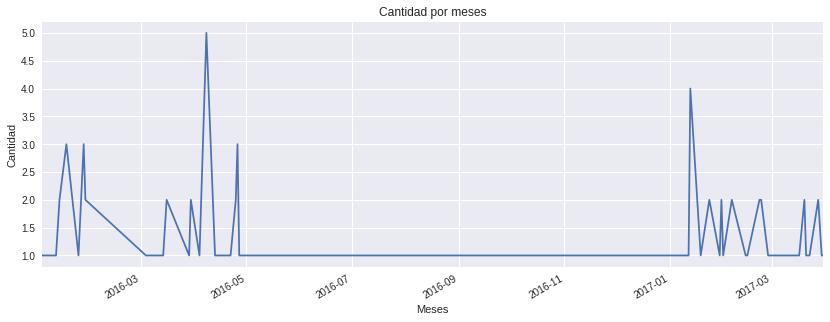

In [30]:
meses.plot(figsize=(14, 5))
plt.title("Cantidad por meses")
plt.xlabel("Meses")
plt.ylabel("Cantidad");

In [31]:
data['N° de Pisos'].value_counts('%')

2    0.853333
1    0.080000
7    0.026667
5    0.026667
3    0.013333
Name: N° de Pisos, dtype: float64

Se puede apreciar como en el tipo de construcción predomina los que tienen `2 pisos` estos representan claramente la mayoría con un __85%__, le sigue el que tiene `1 piso` con un __8%__ y el resto lo complementan entre 7,5 y 3 pisos.

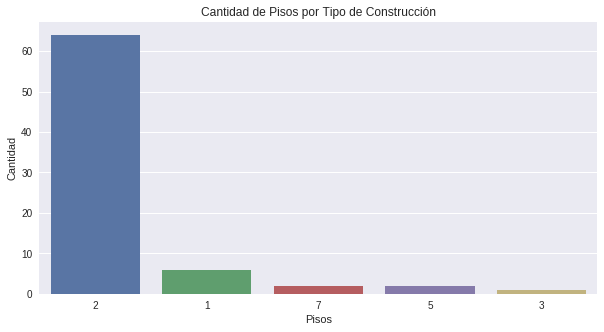

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x='N° de Pisos', data=data, order=data['N° de Pisos'].value_counts().index)
plt.xlabel('Pisos')
plt.ylabel("Cantidad")
plt.title("Cantidad de Pisos por Tipo de Construcción");

Se puede apreciar como la mayoría del tipo de construcción está situada desde los 28 hasta los 1300 M2, los demás se pueden considerar como outliers o son construcción que poseen una cantidad de M2 como Edificios, Malls, entre otros.

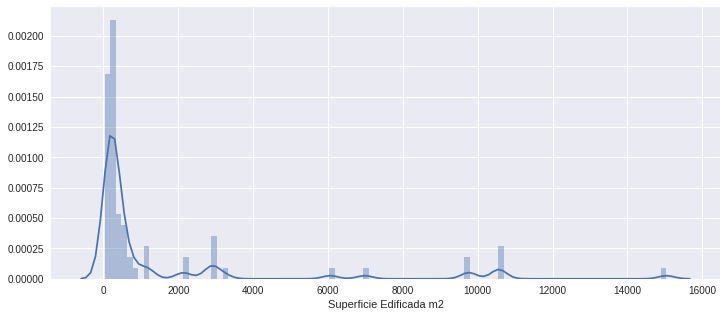

In [33]:
plt.figure(figsize=(12, 5))
sns.distplot(data['Superficie Edificada m2'], bins=100)
plt.xlabel('Superficie Edificada m2');

En el boxplot se aprecia como está distribuida la mediana de esta varible.

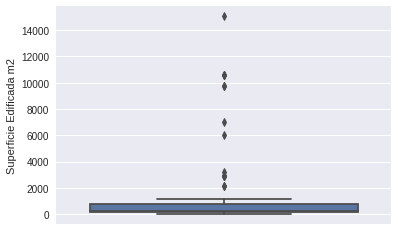

In [34]:
sns.boxplot(y='Superficie Edificada m2', data=data)

Podemos apreciar como a medida que el tipo de construcción tiene más metros cuadrados la cantidad de pisos tiene una tendencia positiva y es algo  lógico debido a que mayor metraje más posibilidad hay de crear nuevos espacios.

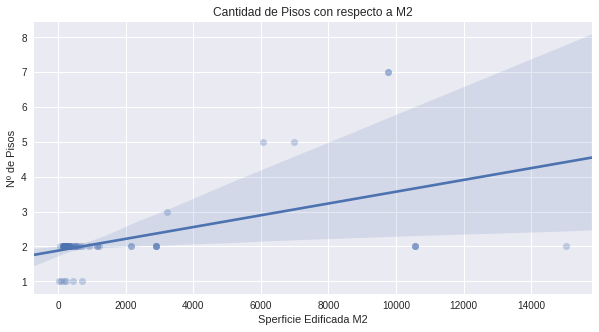

In [35]:
plt.figure(figsize=(10, 5))
sns.regplot(x='Superficie Edificada m2', y='N° de Pisos', data=data, scatter_kws={'alpha':0.30})
plt.xlabel("Sperficie Edificada M2")
plt.ylabel("Nº de Pisos")
plt.title("Cantidad de Pisos con respecto a M2");

#### Recodificando Descripción Acto para hacer Análisis
Agrupé categorías que eran similares para englobarla en una sola y así poder tener mejor un estudio o análisis con respecto a otras variables como por ejemplo, cantidad de pisos.

In [36]:
data['Descripción Acto'] = data['Descripción Acto'].str.strip()
data['Descripción Acto'] = data['Descripción Acto'].astype('category')

In [37]:
data['Descripción Acto'] = np.where((data['Descripción Acto'] == 'VIVIENDA UNIFAMILIAR') |
                                    (data['Descripción Acto'] == 'VIVIENDA') |
                                    (data['Descripción Acto'] == 'VIVIENDA COLECTIVA'), 
                                    'VIVIENDA', data['Descripción Acto'])

In [38]:
data['Descripción Acto'] = np.where((data['Descripción Acto'] == 'EQUIPAMIENTO DE SERVICIOS') |
                                    (data['Descripción Acto'] == 'EQUIPAMIENTO') |
                                    (data['Descripción Acto'] == 'EQUIPAMIENTO COMERCIO') |
                                    (data['Descripción Acto'] == 'EQUIPAMIENTO - SERVICIOS') |
                                    (data['Descripción Acto'] == 'EQUIP.DE COMERCIO Y SERVICIOS'),
                                    'EQUIPAMIENTO', data['Descripción Acto'])

In [39]:
data['Descripción Acto'] = np.where((data['Descripción Acto'] == 'EDUCACIONAL - JARDIN INFANTIL') |
                                    (data['Descripción Acto'] == 'EDUCACIONAL'), 'EDUCACIONAL',
                                    data['Descripción Acto'])

data['Descripción Acto'] = np.where(data['Descripción Acto'] == '---', 'OTRO', data['Descripción Acto'])

In [40]:
data['Descripción Acto'] = np.where((data['Descripción Acto'] == 'COMERCIAL') |
                                    (data['Descripción Acto'] == 'COMERCIO'), 'COMERCIAL', data['Descripción Acto'])

In [41]:
data['Descripción Acto'].value_counts('%')

VIVIENDA                    0.706667
EQUIPAMIENTO                0.120000
COMERCIAL                   0.066667
ELEMENTO PUBLICITARIO       0.040000
EDUCACIONAL                 0.026667
ESPARCIMIENTO Y DEPORTES    0.026667
OTRO                        0.013333
Name: Descripción Acto, dtype: float64

Podemos apreciar como la categoría `VIVIENDA` en Descripción Acto tiene corresponde al __71%__, seguida de `EQUIPAMIENTO` con un __12%__ y el resto se complementan entre las demás.

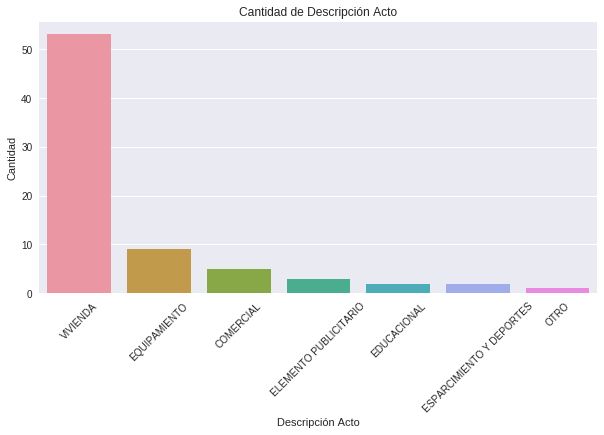

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Descripción Acto', data=data, order=data['Descripción Acto'].value_counts().index)
plt.xlabel("Descripción Acto")
plt.xticks(rotation=45)
plt.ylabel("Cantidad")
plt.title("Cantidad de Descripción Acto");

In [43]:
pivot = pd.pivot_table(data, index='Descripción Acto', columns='N° de Pisos', values='Numero Permiso', 
                       aggfunc='count', fill_value=0)

Este gráfico corresponde a como está relacionado la cantidad de pisos con el tipo de construcción, se puede apreciar claramente como la mayoría de los que tienen __2 pisos__ son de tipo `VIVIENDA`, seguido del tipo `EQUIPAMIENTO`. 

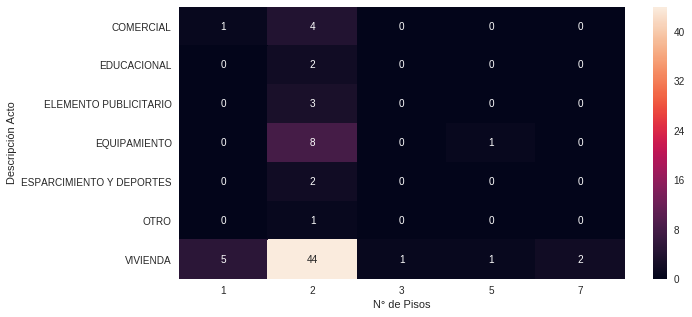

In [44]:
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt='g');

Representación en porcentaje de `Decripción Acto` con respecto a los `Pisos`.

In [45]:
x = pd.crosstab(data['Descripción Acto'], data['N° de Pisos'])
x = x.apply(lambda z: round((z/z.sum()) * 100, 2), axis=0)
x

N° de Pisos,1,2,3,5,7
Descripción Acto,,,,,
COMERCIAL,16.67,6.25,0.0,0.0,0.0
EDUCACIONAL,0.00,3.12,0.0,0.0,0.0
ELEMENTO PUBLICITARIO,0.00,4.69,0.0,0.0,0.0
EQUIPAMIENTO,0.00,12.50,0.0,50.0,0.0
ESPARCIMIENTO Y DEPORTES,0.00,3.12,0.0,0.0,0.0
OTRO,0.00,1.56,0.0,0.0,0.0
VIVIENDA,83.33,68.75,100.0,50.0,100.0


In [46]:
data.head()

,Arquitecto,Calle,Cert Inf Prev N°,Constructor,Denominación,Descripción Acto,Efectos Generales,Fecha Ultima Actualización,Numero Permiso,N° Domiciliario,N° de Pisos,Propietario,Rol,Superficie Edificada m2
0,MIRKO MARINCICH,Av. Luis Pasteur,1727 del 2014,MIRKO MARINCICH,OBRA MENOR DE ELEMENTO PUBLICITARIO,ELEMENTO PUBLICITARIO,NO,2016-01-04,01,6420,2,MARIA DE LOS ANGELES ALVAREZ CARUS,01293-00015,2895.57
1,HANS BOSTELMANN BIDEGAIN,Joaquín Cerda,833 del 2015,HANS BOSTELMANN BIDEGAIN,OBRA MENOR DE AMPLIACION VIVIENDA UNIFAMILIAR,VIVIENDA,NO,2016-01-05,02,6295,2,OLIVIER JEAN-MARIE BASTET,01191-00019,179.66
2,ANDREA MARCHETTI IBIETA,Las Hualtatas,1295 del 2015,ANDREA MARCHETTI IBIETA,AMPLIACION Y HABILITACION DE OFICINAS Y LOCAL,EQUIPAMIENTO,NO,2016-01-11,100,5520,2,INVERSIONES BACKHOUSE Y CÍA. LTDA.,01031-00001,179.49
3,CAROLINA CARRASCO PIZARRO,Av. Américo Vespucio,69 del 2015,JAVIER ENRIQUE ARENAS ARMIJO,CAMBIO DE DESTINO A JARDIN INFANTIL y SALA CUNA,EDUCACIONAL,NO,2016-01-12,101,2076,2,INMOBILIARIA y RENTAS PAN ASIA LTDA.,00533-00019,211.60
4,RAIMUNDO LIRA VALDES,Las Hualtatas,706 del 2015,CARLOS FELIPE BOETSCH FERNANDEZ,ELEMENTO PUBLICITARIO PROVISORIO ADOSADO A CIE...,ELEMENTO PUBLICITARIO,NO,2016-01-14,102,4869,2,SOCIEDAD INMOBILIARIA E INV. SIERRA BELLA SA,00977-00017,2895.57
